<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Running K-Means for k=2
Silhouette Score: 0.6894


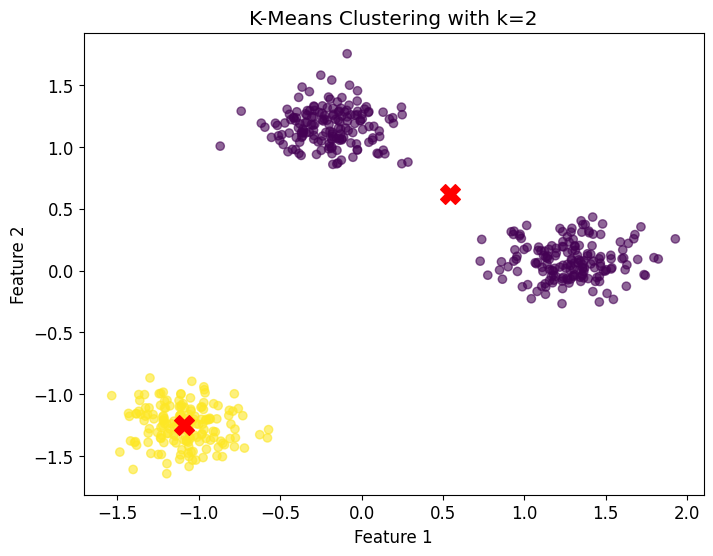


Running K-Means for k=3
Silhouette Score: 0.8448


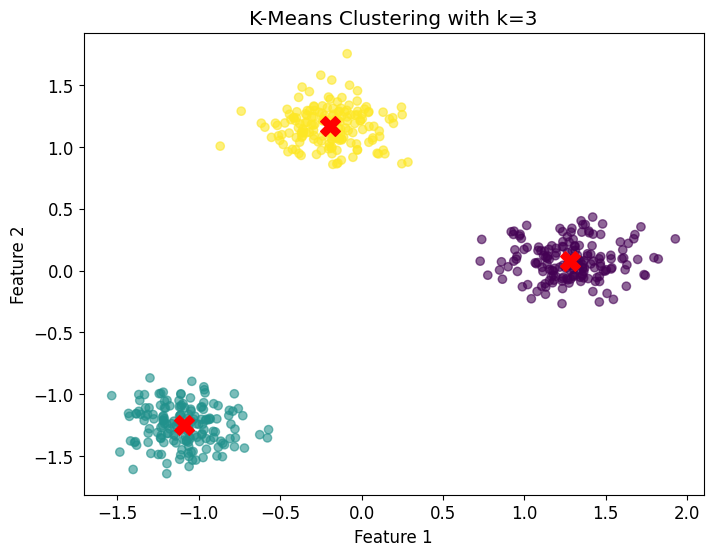


Running K-Means for k=4
Silhouette Score: 0.6851


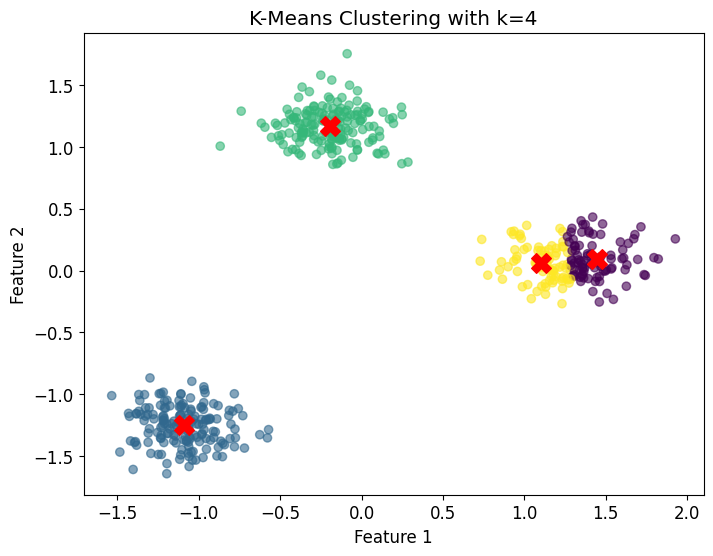

In [55]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

class KMeansOptimized:
    def __init__(self, k, max_iter=300, n_init=10, tol=1e-4):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.tol = tol
        self.centroids = None

    def _kmeans_plus_plus_init(self, X):
        n_samples = X.shape[0]
        centroids = np.empty((self.k, X.shape[1]), dtype=X.dtype)
        # Randomly choose first centroid
        centroids[0] = X[np.random.randint(n_samples)]
        for i in range(1, self.k):
            dist_sq = np.min(np.sum((X[:, None, :] - centroids[:i]) ** 2, axis=2), axis=1)
            probs = dist_sq / dist_sq.sum()
            cumulative_probs = np.cumsum(probs)
            r = np.random.rand()
            index = np.searchsorted(cumulative_probs, r)
            centroids[i] = X[index]
        return centroids

    def fit(self, X):
        best_inertia = np.inf
        best_centroids = None
        best_labels = None

        for _ in range(self.n_init):
            centroids = self._kmeans_plus_plus_init(X)

            for _ in range(self.max_iter):
                distances = np.linalg.norm(X[:, None] - centroids, axis=2)
                labels = np.argmin(distances, axis=1)

                new_centroids = np.array([
                    X[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
                    for i in range(self.k)
                ])

                if np.allclose(centroids, new_centroids, atol=self.tol):
                    break
                centroids = new_centroids

            inertia = np.sum(np.min(np.square(np.linalg.norm(X[:, None] - centroids, axis=2)), axis=1))
            if inertia < best_inertia:
                best_inertia = inertia
                best_centroids = centroids.copy()
                best_labels = labels.copy()

        self.centroids = best_centroids
        return best_labels, self.centroids

def silhouette_score_manual(X, labels):
    n_samples = X.shape[0]
    scores = np.zeros(n_samples)

    for i in range(n_samples):
        same_cluster = (labels == labels[i])
        a = np.mean(np.linalg.norm(X[i] - X[same_cluster], axis=1)) if np.sum(same_cluster) > 1 else 0
        b_vals = []
        for label in np.unique(labels):
            if label != labels[i]:
                b_vals.append(np.mean(np.linalg.norm(X[i] - X[labels == label], axis=1)))
        b = np.min(b_vals) if b_vals else 0
        scores[i] = (b - a) / max(a, b) if max(a, b) > 0 else 0

    return np.mean(scores)

def visualize_clusters(X, labels, centroids, k):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

if __name__ == "__main__":
    from sklearn.datasets import make_blobs

    np.random.seed(42)
    # Generate synthetic data with clear cluster separation
    X, _ = make_blobs(n_samples=500, centers=3, cluster_std=1.0, random_state=42)

    # Feature scaling for consistent distance measurement
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    for k in [2, 3, 4]:
        print(f"\nRunning K-Means for k={k}")
        model = KMeansOptimized(k=k, max_iter=300, n_init=20, tol=1e-5)
        labels, centroids = model.fit(X_scaled)
        score = silhouette_score_manual(X_scaled, labels)
        print(f"Silhouette Score: {score:.4f}")
        visualize_clusters(X_scaled, labels, centroids, k)
